# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import pandas as pd
df = pd.read_csv("tic-tac-toe.csv")

In [2]:
df.head(5)


,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


In [4]:
# Separate features and target variable
#X = df.drop('class', axis=1)  # Features
#y = df['class']               # Target

# One-hot encode the features
#X_encoded = pd.get_dummies(X, columns=X.columns)

In [5]:
mapping_dict = {'x': 1, 'o': 0, 'b': 2}
df.replace(mapping_dict, inplace=True)

In [6]:
df["class"] = df["class"].astype(int)

In [7]:
df["class"]

0      1
1      1
2      1
3      1
4      1
      ..
953    0
954    0
955    0
956    0
957    0
Name: class, Length: 958, dtype: int64

In [8]:
## X
X = df.iloc[:, :9]
y = df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
953    0
954    0
955    0
956    0
957    0
Name: class, Length: 958, dtype: int64

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [9]:
# Split the data
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
### Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf



model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
## dropout to improve model
model.add(Dropout(0.2))  ## avoid overfitting
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()


2024-05-30 17:15:30.914863: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,666 (37.76 KB)

 Trainable params: 9,666 (37.76 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#from keras.optimizers import Adam
import tensorflow.keras
my_opt = tensorflow.keras.optimizers.Adagrad(learning_rate=0.01, epsilon=0.1, decay=0.0)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [12]:
# compile the model using adam

model.compile(loss='sparse_categorical_crossentropy', optimizer= my_opt, metrics= ['accuracy'] )

In [13]:
## fit the training data and evaluate with test data

batch_size= 15
epochs = 100

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))


Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6236 - loss: 0.6569 - val_accuracy: 0.6510 - val_loss: 0.6093
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6663 - loss: 0.6361 - val_accuracy: 0.6510 - val_loss: 0.5980
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6823 - loss: 0.5973 - val_accuracy: 0.6562 - val_loss: 0.5907
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6870 - loss: 0.5961 - val_accuracy: 0.6562 - val_loss: 0.5840
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6691 - loss: 0.5933 - val_accuracy: 0.6719 - val_loss: 0.5799
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7041 - loss: 0.5760 - val_accuracy: 0.6510 - val_loss: 0.5726
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - loss: 0.6159 - val_accuracy: 0.6771 - val_loss: 0.5780
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6976 - loss: 0.5633 - val_accuracy: 0.6562 - v

In [14]:
# Save the entire model to a file with .keras extension
model.save('tic_tac_toe_model.keras')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [15]:
#load the model
from tensorflow.keras.models import load_model

loaded_model = load_model('tic_tac_toe_model.keras') 


In [16]:
num_samples = 5
X_sample = X_test[:num_samples]
y_sample = y_test[:num_samples]


In [17]:
# Make predictions
predictions = loaded_model.predict(X_sample)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[0.66274077, 0.33725923],
       [0.02154894, 0.978451  ],
       [0.6334786 , 0.3665214 ],
       [0.6411602 , 0.35883978],
       [0.61231536, 0.3876846 ]], dtype=float32)

In [18]:
y_sample

836    0
477    1
350    1
891    0
855    0
Name: class, dtype: int64

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [22]:
# your code here

model2 = Sequential()

model2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
## dropout to improve model
model2.add(Dropout(0.2))  ## avoid overfitting
model2.add(Dense(64, activation='relu'))

model2.add(Dropout(0.2))  ## avoid overfitting
model2.add(Dense(32, activation='relu'))

model2.add(Dropout(0.2))
model2.add(Dense(2, activation='softmax'))

model2.summary()


my_opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01, epsilon=0.1, decay=0.0)

model2.compile(loss='sparse_categorical_crossentropy', optimizer= my_opt, metrics= ['accuracy'] )


batch_size= 10
epochs = 80

history = model2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,682 (45.63 KB)

 Trainable params: 11,682 (45.63 KB)

 Non-trainable params: 0 (0.00 B)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5984 - loss: 0.6636 - val_accuracy: 0.6510 - val_loss: 0.6149
Epoch 2/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6552 - loss: 0.6332 - val_accuracy: 0.6562 - val_loss: 0.5927
Epoch 3/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6546 - loss: 0.6157 - val_accuracy: 0.6510 - val_loss: 0.5807
Epoch 4/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6877 - loss: 0.5885 - val_accuracy: 0.6667 - val_loss: 0.5624
Epoch 5/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6625 - loss: 0.6025 - val_accuracy: 0.7135 - val_loss: 0.5430
Epoch 6/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6477 - loss: 0.6099 - val_accuracy: 0.6615 - val_loss: 0.5347
Epoch 7/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7081 - loss: 0.5834 - val_accuracy: 0.7344 - val_loss: 0.5094
Epoch 8/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7142 - loss: 0.5625 - val_accuracy: 0.7604 - val_los

In [23]:
score = model2.evaluate(X_test, y_test, verbose=3)
print("Test loss:", score[0])
print("Test accuraccy:", score[1])

Test loss: 0.07581420987844467
Test accuraccy: 0.9635416865348816


In [24]:
score = model.evaluate(X_test, y_test, verbose=3)
print("Test loss:", score[0])
print("Test accuraccy:", score[1])

Test loss: 0.2919815480709076
Test accuraccy: 0.890625


In [29]:
## ajust the leaarning rate

model3 = Sequential()

model3.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
## dropout to improve model
model3.add(Dropout(0.2))  ## avoid overfitting
model3.add(Dense(64, activation='relu'))

model3.add(Dropout(0.2))  ## avoid overfitting
model3.add(Dense(32, activation='relu'))

model3.add(Dropout(0.2))
model3.add(Dense(2, activation='softmax'))

model3.summary()


my_opt = tensorflow.keras.optimizers.Adam(learning_rate=0.025, epsilon=0.1, decay=0.0)

model3.compile(loss='sparse_categorical_crossentropy', optimizer= my_opt, metrics= ['accuracy'] )


batch_size= 32
epochs = 70

history = model3.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,682 (45.63 KB)

 Trainable params: 11,682 (45.63 KB)

 Non-trainable params: 0 (0.00 B)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.5080 - loss: 0.7061 - val_accuracy: 0.6510 - val_loss: 0.6318
Epoch 2/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6432 - loss: 0.6382 - val_accuracy: 0.6510 - val_loss: 0.6167
Epoch 3/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6830 - loss: 0.6050 - val_accuracy: 0.6615 - val_loss: 0.5992
Epoch 4/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6456 - loss: 0.6103 - val_accuracy: 0.6667 - val_loss: 0.5821
Epoch 5/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6821 - loss: 0.6005 - val_accuracy: 0.6719 - val_loss: 0.5696
Epoch 6/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6963 - loss: 0.5727 - val_accuracy: 0.6771 - val_loss: 0.5562
Epoch 7/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6771 - loss: 0.6144 - val_accuracy: 0.6510 - val_loss: 0.5668
Epoch 8/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6816 - loss: 0.5900 - val_accuracy: 0.6875 -

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

model4 = Sequential()

model4.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
## dropout to improve model
model4.add(Dropout(0.2))  ## avoid overfitting
model4.add(Dense(64, activation='relu'))

model4.add(Dropout(0.2))  ## avoid overfitting
model4.add(Dense(32, activation='relu'))

model4.add(Dropout(0.2))
model4.add(Dense(2, activation='softmax'))

model4.summary()


my_opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.1, decay=0.0)

model4.compile(loss='sparse_categorical_crossentropy', optimizer= my_opt, metrics= ['accuracy'] )

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


batch_size= 10
epochs = 150

history = model4.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,682 (45.63 KB)

 Trainable params: 11,682 (45.63 KB)

 Non-trainable params: 0 (0.00 B)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6277 - loss: 0.6652 - val_accuracy: 0.6562 - val_loss: 0.6538
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 0.6639 - val_accuracy: 0.6510 - val_loss: 0.6409
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6368 - loss: 0.6445 - val_accuracy: 0.6510 - val_loss: 0.6321
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6505 - loss: 0.6422 - val_accuracy: 0.6510 - val_loss: 0.6274
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 0.6567 - val_accuracy: 0.6510 - val_loss: 0.6215
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6378 - loss: 0.6357 - val_accuracy: 0.6510 - val_loss: 0.6171
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6348 - loss: 0.6433 - val_accuracy: 0.6510 - val_loss: 0.6125
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 0.6169 - val_accuracy: 0.6510 - v

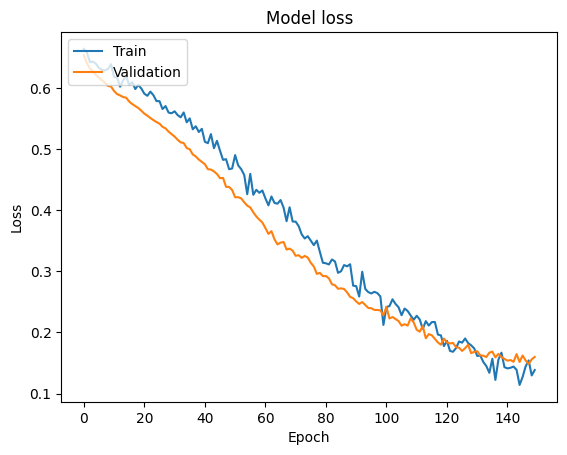

In [39]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Which approach(es) did you find helpful to improve your model performance?**

In [20]:
# your answer here